<a href="https://colab.research.google.com/github/lschoch/MLA_LHS/blob/main/MLA1_LHS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Machine Learning Assignment 1**
#**Lawrence Schoch**
#**CS430-ON**
#**Machine Learning in the Cloud**
---

##Import libraries, mount google drive.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


##Read weather_2012.csv and display the first five rows.

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/1CS430/weather_2012.csv')
df.head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


##Display the last five rows and a sample of five random rows from weather_2012.csv

In [ ]:
df.tail()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow
8783,12/31/2012 23:00,0.0,-2.1,86,30,11.3,99.89,Snow


In [ ]:
df.sample(5)

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
6170,9/14/2012 2:00,18.2,14.8,81,4,25.0,101.69,Clear
2766,4/25/2012 6:00,5.2,0.1,70,20,24.1,99.93,Rain Showers
5144,8/2/2012 8:00,23.9,19.9,78,11,48.3,100.61,Mainly Clear
7314,10/31/2012 18:00,8.8,7.4,91,13,25.0,99.37,Cloudy
6752,10/8/2012 8:00,5.4,1.1,74,7,48.3,101.92,Mainly Clear


##Display the column names.

In [ ]:
list(df)

['Date/Time',
 'Temp (C)',
 'Dew Point Temp (C)',
 'Rel Hum (%)',
 'Wind Spd (km/h)',
 'Visibility (km)',
 'Stn Press (kPa)',
 'Weather']

##Rename columns

In [ ]:
df.rename(columns = {'Date/Time':'date_time'},inplace=True)
df.rename(columns = {'Temp (C)':'temp_c'},inplace=True)
df.rename(columns = {'Dew Point Temp (C)':'dew_point'},inplace=True)
df.rename(columns = {'Rel Hum (%)':'relative_humidity'},inplace=True)
df.rename(columns = {'Wind Spd (km/h)':'wind_speed'},inplace=True)
df.rename(columns = {'Visibility (km)':'visibility'},inplace=True)
df.rename(columns = {'Stn Press (kPa)':'pressure'},inplace=True)
df.rename(columns = {'Weather':'weather'},inplace=True)
list(df)

['date_time',
 'temp_c',
 'dew_point',
 'relative_humidity',
 'wind_speed',
 'visibility',
 'pressure',
 'weather']

##Show standard statistics for numerical data.

In [ ]:
df.describe()

,temp_c,dew_point,relative_humidity,wind_speed,visibility,pressure
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


##Add a column named temp_f and rearrange columns so temp_f appears immediately before temp_c.

In [ ]:
df = df.assign(temp_f=df['temp_c'] * 9 / 5 + 32) # adds new column named temp_f calculated from temp_c
cols = ['date_time', 'temp_f'] # list the first two columns in the new column order
new_order = cols + (df.columns.drop(cols).tolist()) # concatenate first two with those remaining 
df = df[new_order]  # resets order of columns in df
df.head()


,date_time,temp_f,temp_c,dew_point,relative_humidity,wind_speed,visibility,pressure,weather
0,1/1/2012 0:00,28.76,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,28.76,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,28.76,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,29.30,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,29.30,-1.5,-3.3,88,7,4.8,101.23,Fog


##Display data types of all columns.

In [ ]:
df.dtypes

date_time             object
temp_f               float64
temp_c               float64
dew_point            float64
relative_humidity      int64
wind_speed             int64
visibility           float64
pressure             float64
weather               object
dtype: object

##Convert the date_time column to datetime and verify that the conversion was successful.

In [ ]:
df['date_time'] = pd.to_datetime(df['date_time'])
#verify that the data type of the date_time column has been converted to datetime64[ns]
if df['date_time'].dtypes == 'datetime64[ns]' :
  print("The date/time conversion was successful.")
else :
  print("Warning - the date/time conversion was not successful.")

The date/time conversion was successful.


##Get the monthly average temperature (in F).

In [ ]:
monthly_avg = df.groupby(df.loc[:,'date_time'].dt.month)['temp_f'].mean()
print(monthly_avg)


date_time
1     18.731290
2     24.395000
3     37.618226
4     44.616750
5     61.227984
6     68.241250
7     73.022097
8     72.102742
9     61.672000
10    51.718952
11    33.676500
12    26.048629
Name: temp_f, dtype: float64


##Scatter plot showing temperature vs relative humidity.

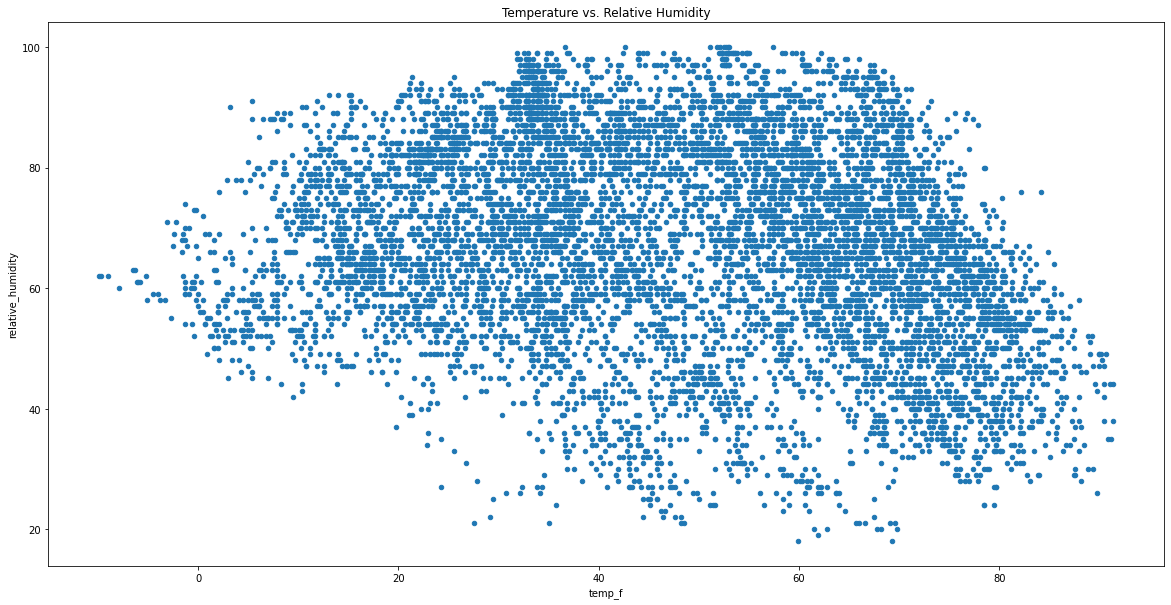

In [ ]:
df.plot(kind='scatter', title="Temperature vs. Relative Humidity", x='temp_f', y='relative_humidity', figsize=(20,10))

##Line chart showing average temperature per month.

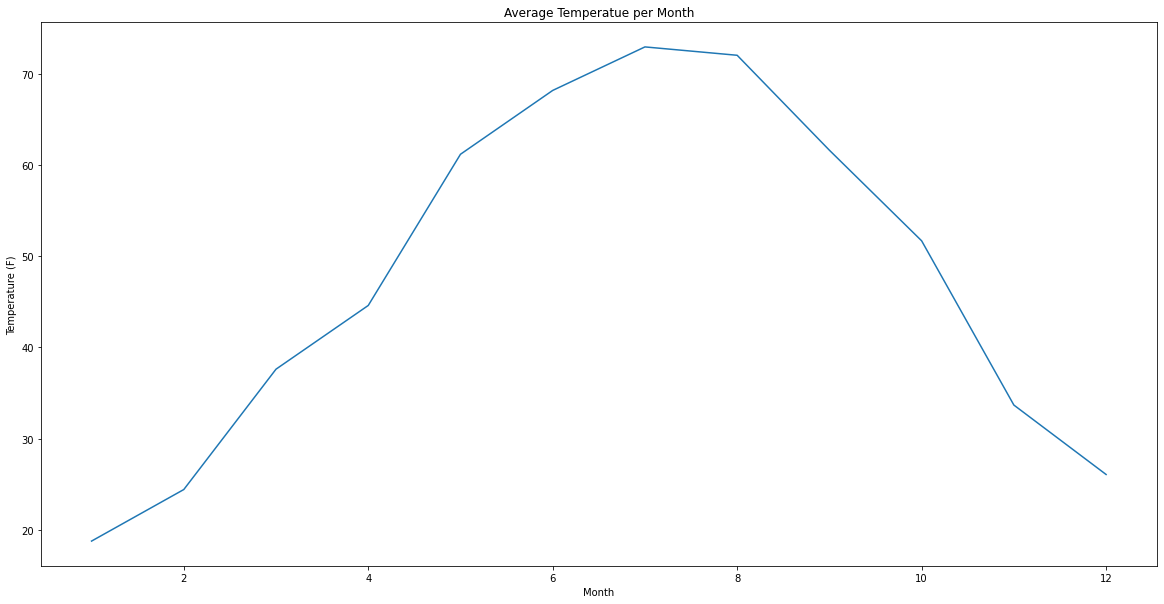

In [ ]:
ax = monthly_avg.plot(kind='line', title='Average Temperatue per Month', x='monthly_average.index', y='temp_f', figsize=(20,10))
ax.set(xlabel='Month', ylabel='Temperature (F)')
plt.pyplot.show()

##Box plot.

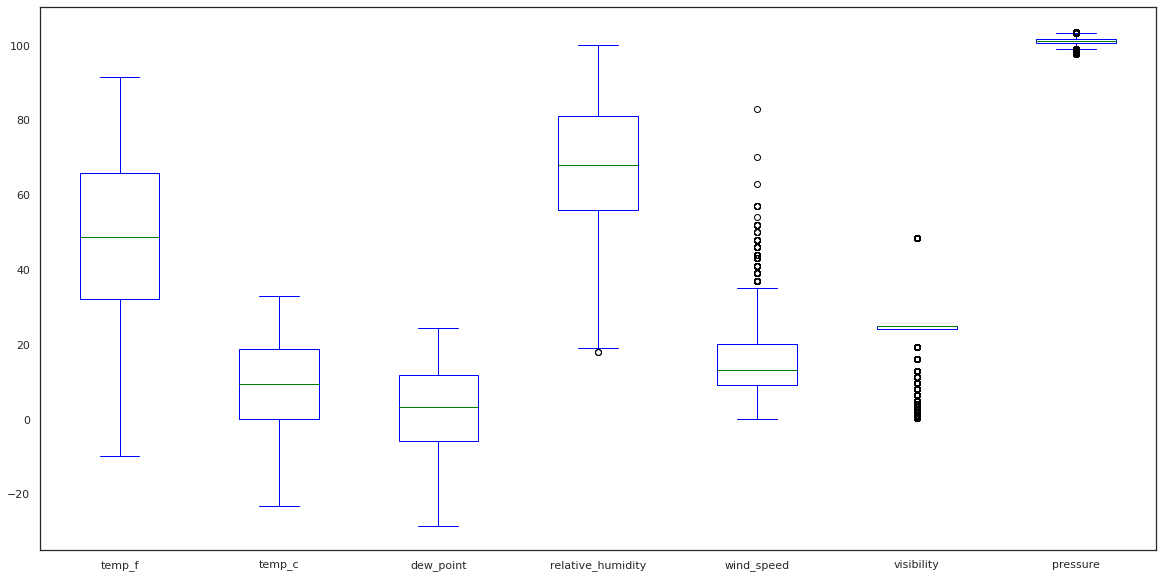

In [111]:
ax = df.boxplot(grid=False, figsize=(20,10), patch_artist=True,
                boxprops=dict(facecolor='None', color='blue'),
                whiskerprops=dict(color='blue'),
                capprops=dict(color='blue'),
                medianprops=dict(color='green')
                )